In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score

In [8]:
# Load your dataset
dataset = pd.read_csv('/content/heart.csv')

In [9]:
# Assuming your dataset has features and target column
X = dataset.drop('target', axis=1)  # Features
y = dataset['target']  # Target

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1631 non-null   int64  
 1   sex       1631 non-null   int64  
 2   cp        1631 non-null   int64  
 3   trestbps  1631 non-null   int64  
 4   chol      1631 non-null   int64  
 5   fbs       1631 non-null   int64  
 6   restecg   1631 non-null   int64  
 7   thalach   1631 non-null   int64  
 8   exang     1631 non-null   int64  
 9   oldpeak   1631 non-null   float64
 10  slope     1631 non-null   int64  
 11  ca        1631 non-null   int64  
 12  thal      1631 non-null   int64  
 13  target    1631 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 178.5 KB


In [11]:
dataset.shape

(1631, 14)

In [12]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000
mean,54.408952,0.690987,0.951563,131.616186,246.098099,0.148988,0.529123,149.312078,0.332925,1.059657,1.390558,0.744942,2.320049,0.524831
std,9.070421,0.462228,1.029972,17.513916,51.649469,0.356186,0.526807,22.955814,0.471404,1.169270,0.616847,1.027205,0.617204,0.499536
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.437641
oldpeak     0.435751
cp          0.434582
thalach     0.422588
ca          0.385786
slope       0.345799
thal        0.340186
sex         0.280272
age         0.227886
trestbps    0.140980
restecg     0.135378
chol        0.094375
fbs         0.036321
Name: target, dtype: float64


In [15]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

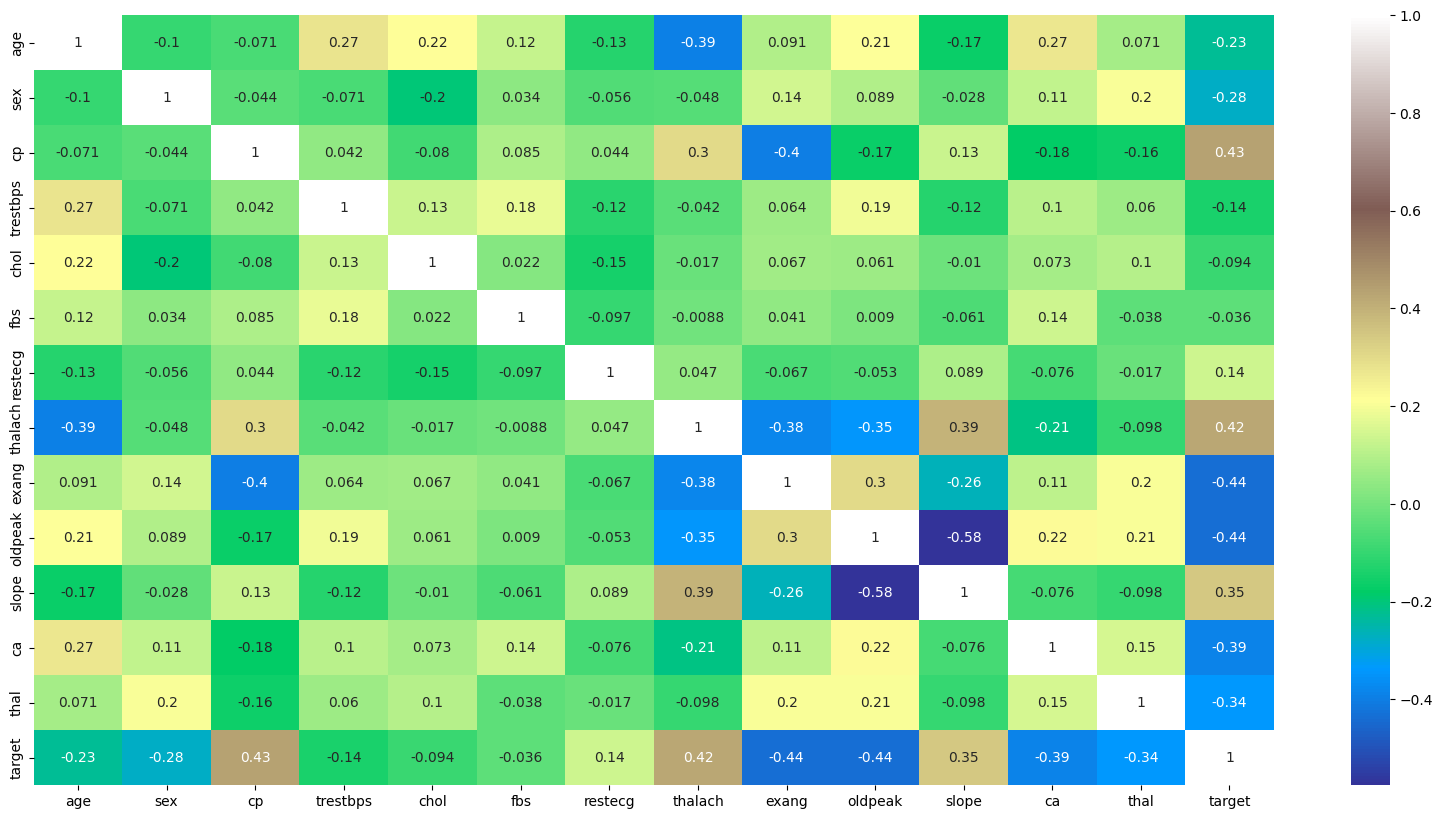

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True, cmap='terrain')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

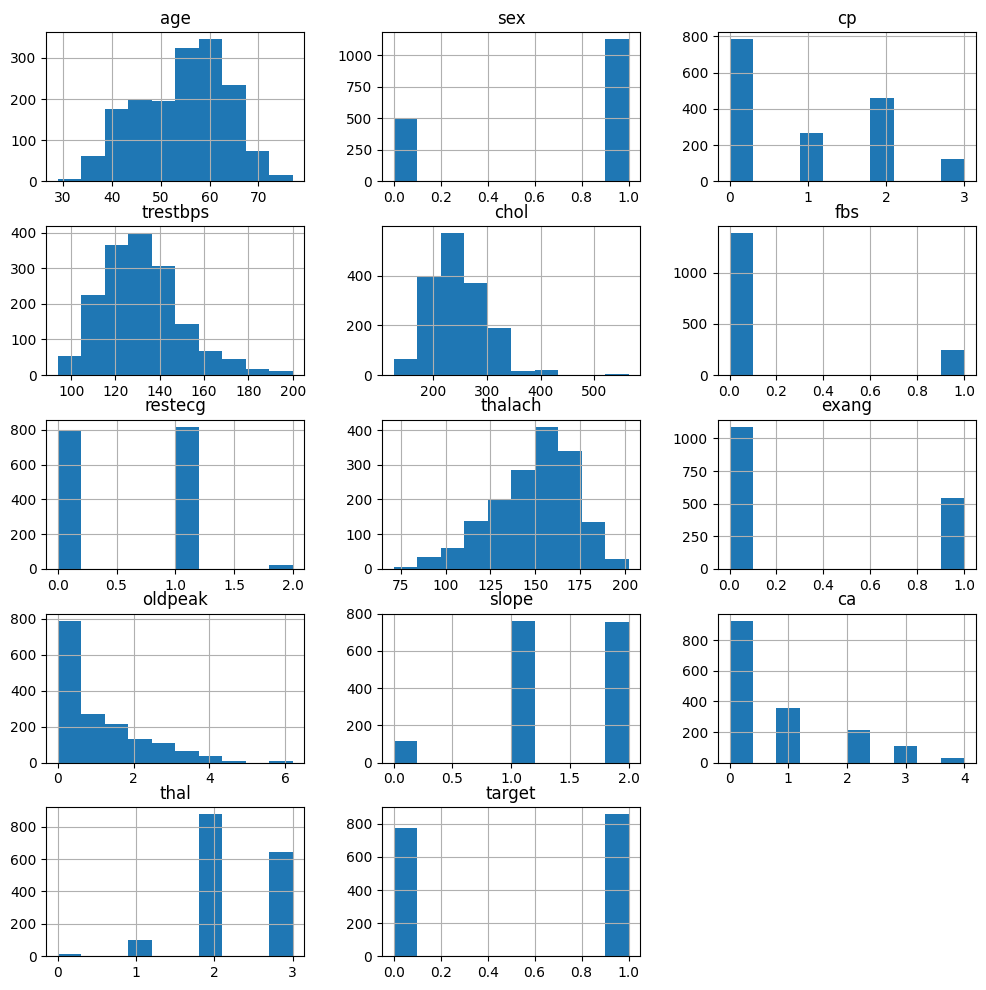

In [17]:
dataset.hist(figsize=(12,12), layout=(5,3))

<Axes: xlabel='target', ylabel='count'>

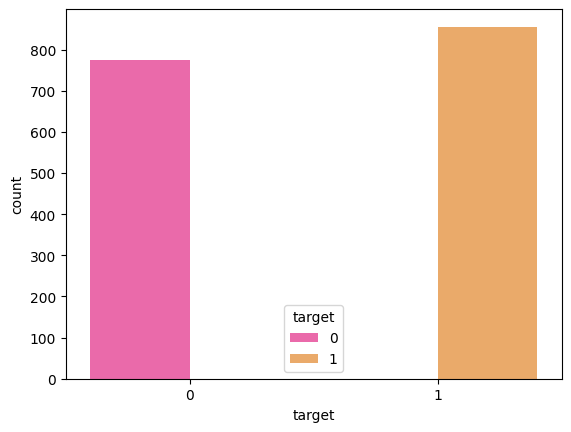

In [18]:
sns.countplot(data=dataset, x='target',hue='target', palette='spring' )

In [19]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# PCA
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
# Initialize classifiers
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
gbm_classifier = GradientBoostingClassifier()

# Train classifiers
svm_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)
nb_classifier.fit(X_train_scaled, y_train)
lr_classifier.fit(X_train_scaled, y_train)
rf_classifier.fit(X_train_scaled, y_train)
gbm_classifier.fit(X_train_scaled, y_train)

# Predictions
svm_pred = svm_classifier.predict(X_test_scaled)
knn_pred = knn_classifier.predict(X_test_scaled)
nb_pred = nb_classifier.predict(X_test_scaled)
lr_pred = lr_classifier.predict(X_test_scaled)
rf_pred = rf_classifier.predict(X_test_scaled)
gbm_pred = gbm_classifier.predict(X_test_scaled)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

results = []

for name, pred in [('SVM', svm_pred), ('KNN', knn_pred), ('Naive Bayes', nb_pred),
                   ('Logistic Regression', lr_pred), ('Random Forest', rf_pred), ('GBM', gbm_pred)]:
    acc, prec, rec, f1 = evaluate_model(y_test, pred)
    results.append((name, acc, prec, rec, f1))

# Print results
print("Algorithm\tAccuracy\tPrecision\tRecall\tF1 Score")
for name, acc, prec, rec, f1 in results:
    print(f"{name}\t{acc:.4f}\t\t{prec:.4f}\t\t{rec:.4f}\t{f1:.4f}")

Algorithm	Accuracy	Precision	Recall	F1 Score
SVM	0.9480		0.9321		0.9618	0.9467
KNN	0.9480		0.9545		0.9363	0.9453
Naive Bayes	0.8196		0.7849		0.8599	0.8207
Logistic Regression	0.8257		0.7809		0.8854	0.8299
Random Forest	1.0000		1.0000		1.0000	1.0000
GBM	0.9755		0.9745		0.9745	0.9745


Confusion Matrix for SVM:
[[159  11]
 [  6 151]]


<Axes: >

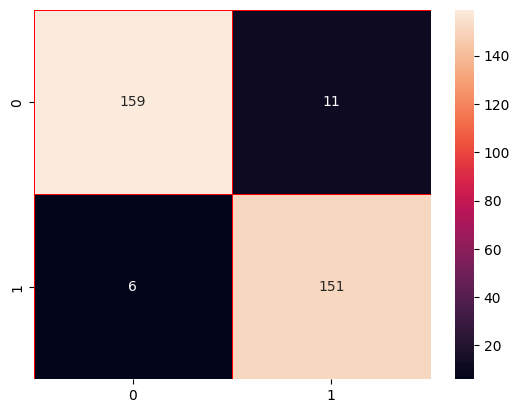

In [23]:
SVC_confusion_matrix = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix for SVM:")
print(SVC_confusion_matrix)
sns.heatmap(SVC_confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")

Confusion Matrix for KNeighborsClassifier:
[[163   7]
 [ 10 147]]


<Axes: >

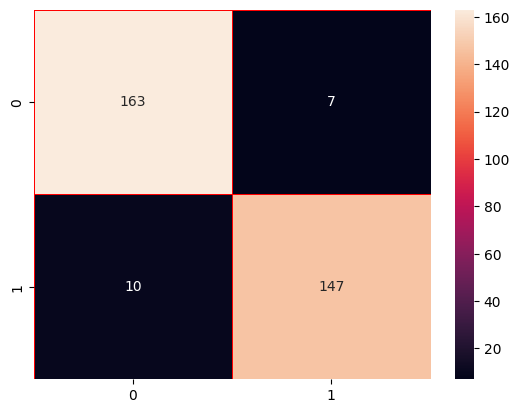

In [24]:
KNeighborsClassifier_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix for KNeighborsClassifier:")
print(KNeighborsClassifier_confusion_matrix)
sns.heatmap(KNeighborsClassifier_confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")

Confusion Matrix for GaussianNB:
[[133  37]
 [ 22 135]]


<Axes: >

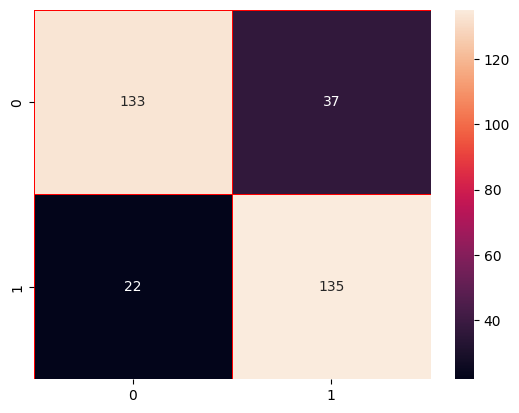

In [25]:
GaussianNB_confusion_matrix = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix for GaussianNB:")
print(GaussianNB_confusion_matrix)
sns.heatmap(GaussianNB_confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")

Confusion Matrix for LogisticRegression:
[[131  39]
 [ 18 139]]


<Axes: >

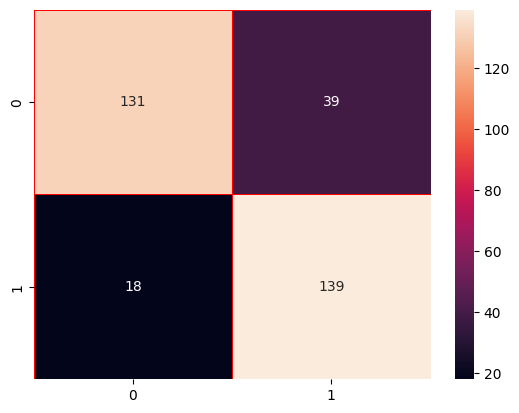

In [26]:
LogisticRegression_confusion_matrix = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix for LogisticRegression:")
print(LogisticRegression_confusion_matrix)
sns.heatmap(LogisticRegression_confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")

Confusion Matrix for RandomForestClassifier:
[[170   0]
 [  0 157]]


<Axes: >

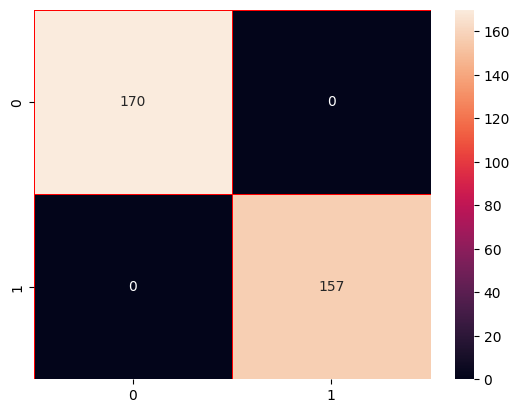

In [27]:
RandomForestClassifier_confusion_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix for RandomForestClassifier:")
print(RandomForestClassifier_confusion_matrix)
sns.heatmap(RandomForestClassifier_confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")

Confusion Matrix for GradientBoostingClassifier:
[[166   4]
 [  4 153]]


<Axes: >

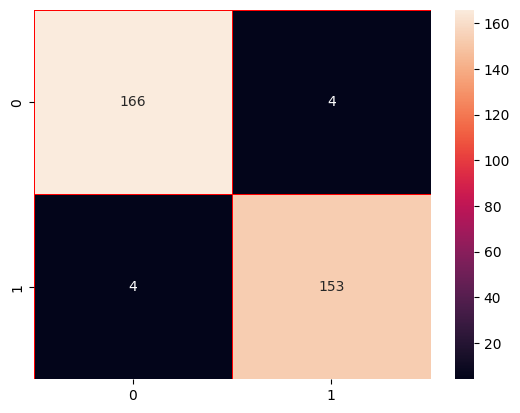

In [28]:
GradientBoostingClassifier_confusion_matrix = confusion_matrix(y_test, gbm_pred)
print("Confusion Matrix for GradientBoostingClassifier:")
print(GradientBoostingClassifier_confusion_matrix)
sns.heatmap(GradientBoostingClassifier_confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")

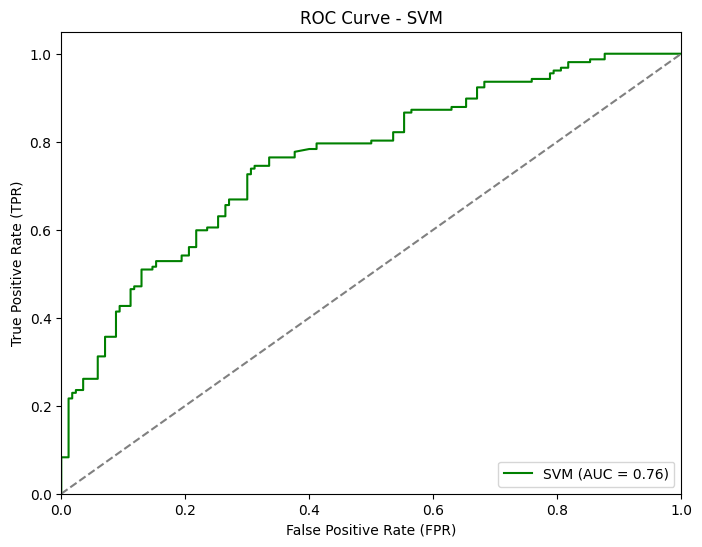

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train an SVM classifier
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
svm_probs = svm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='green', label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()


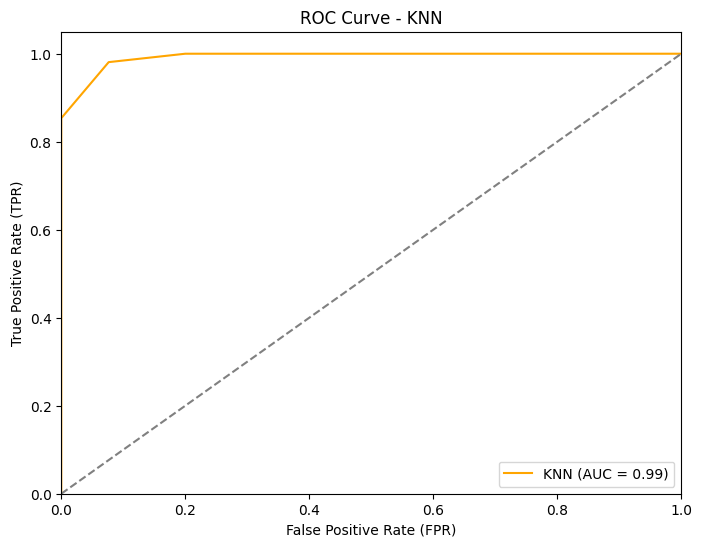

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train a KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
knn_probs = knn_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='orange', label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


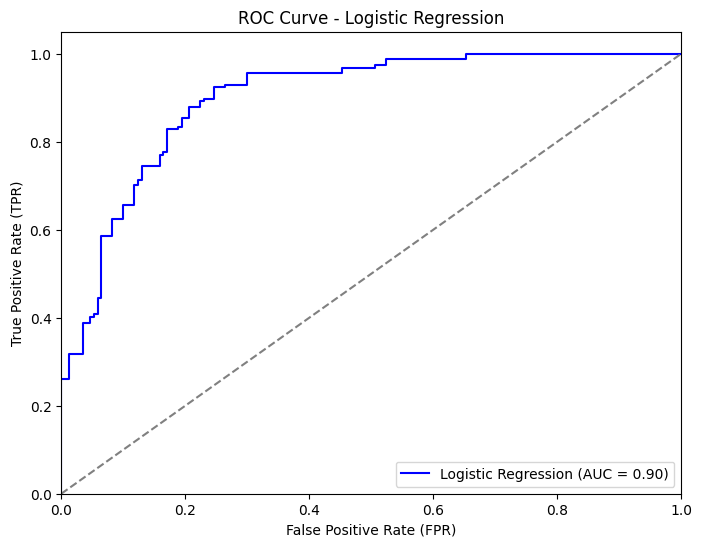

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
logistic_probs = logistic_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_auc = auc(logistic_fpr, logistic_tpr)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(logistic_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


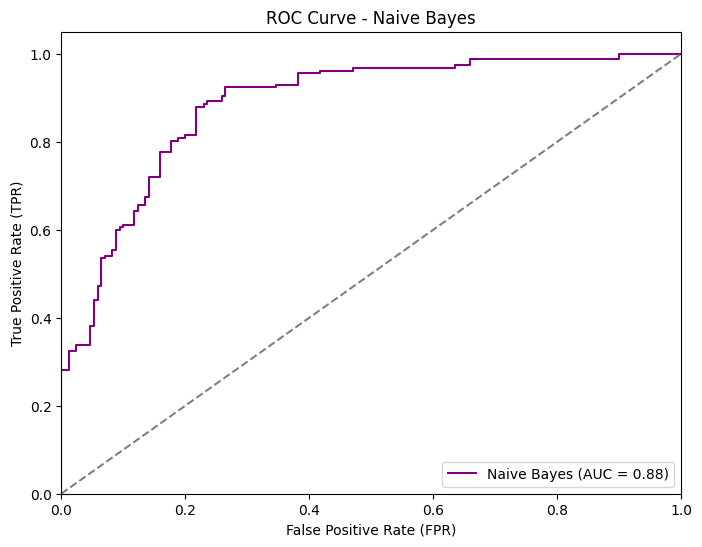

In [32]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
naive_bayes_probs = naive_bayes_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Naive Bayes
naive_bayes_fpr, naive_bayes_tpr, _ = roc_curve(y_test, naive_bayes_probs)
naive_bayes_auc = auc(naive_bayes_fpr, naive_bayes_tpr)

# Plot ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(naive_bayes_fpr, naive_bayes_tpr, color='purple', label='Naive Bayes (AUC = {:.2f})'.format(naive_bayes_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()


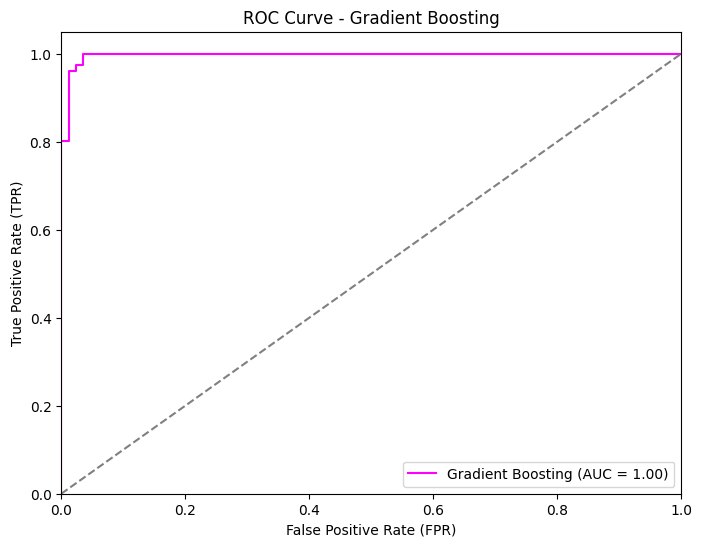

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
gradient_boosting_probs = gradient_boosting_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Gradient Boosting
gradient_boosting_fpr, gradient_boosting_tpr, _ = roc_curve(y_test, gradient_boosting_probs)
gradient_boosting_auc = auc(gradient_boosting_fpr, gradient_boosting_tpr)

# Plot ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(gradient_boosting_fpr, gradient_boosting_tpr, color='magenta', label='Gradient Boosting (AUC = {:.2f})'.format(gradient_boosting_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


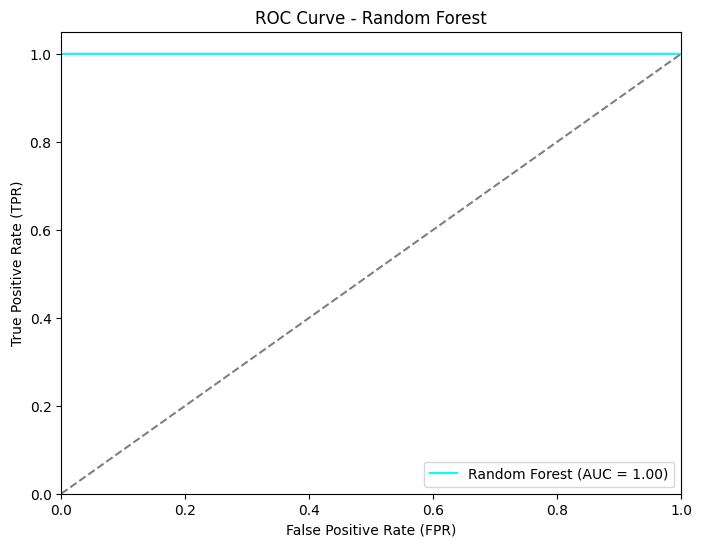

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
random_forest_probs = random_forest_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Random Forest
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(random_forest_fpr, random_forest_tpr, color='cyan', label='Random Forest (AUC = {:.2f})'.format(random_forest_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()
